In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv(r"C:\Users\SAI KEERTHAN\Documents\datasets\Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [7]:
df1.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

#availability column seems to be not that much important


In [9]:
df2=df1.drop(['availability','area_type','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

since no of rows are more, we are droping rows having null values


In [11]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df2.shape

(13246, 5)

In [13]:
df2['location'].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [14]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df2['size']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()                          

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [16]:
df2['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

 total_sqft column is unstructued,we have to do datacleaning on this column

checking values in total_sqft column having other than float values

In [18]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df2[~df2['total_sqft'].apply(check_float)].head(15)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


there are some values having intervals,converting into single value using average

In [20]:
def interval_to_num(x):
    value=x.split('-')
    if len(value)==2:
        avg=((float(value[0]))+float(value[1]))//2
        return avg
    try:
        return float(x)
    except:
        return None

In [21]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(interval_to_num)
df3.head(40)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
5,Whitefield,2,1170.0,2.0,38.00
6,Old Airport Road,4,2732.0,4.0,204.00
7,Rajaji Nagar,4,3300.0,4.0,600.00
8,Marathahalli,3,1310.0,3.0,63.25
9,Gandhi Bazar,6,1020.0,6.0,370.00


In [22]:
df3['total_sqft'].isnull().sum()

46

In [23]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [24]:
len(df3['location'].unique())

1304

In [25]:
df3['location']=df3['location'].apply(lambda x: x.strip())
stats_location=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
stats_location

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(stats_location[stats_location<=10])

1052

In [27]:
stats_locatin_lessthan10=stats_location[stats_location<=10]

In [28]:
df3['location']=df3['location'].apply(lambda x: 'other' if x in stats_locatin_lessthan10 else x)

In [29]:
len(df3['location'].unique())

242

In [30]:
df3.head(30)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


In [31]:
df3.shape

(13246, 6)

checking outliers

In [32]:
df3[(df3['total_sqft']/df3['size'])<300].head(20)
# df3[df3.total_sqft/df3.size<300].head()

,location,size,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
78,Kaval Byrasandra,2,460.0,1.0,22.0,4782.608696
89,Rajaji Nagar,6,710.0,6.0,160.0,22535.211268
119,Hennur Road,2,276.0,3.0,23.0,8333.333333
129,Vishwapriya Layout,7,950.0,7.0,115.0,12105.263158
149,other,6,1034.0,5.0,185.0,17891.682785


In [33]:
df4=df3[~((df3['total_sqft']/df3['size'])<300)]
df4.shape

(12502, 6)

In [34]:

def ppt_outliers(df):
    df_out=pd.DataFrame()
    for index,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        df_in=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out=pd.concat([df_out,df_in],ignore_index=True)
    return df_out

In [35]:
df5=ppt_outliers(df4)
df5.shape

(10241, 6)

In [36]:
df5.head(30)

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.00,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.00,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.00,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.00,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,413.00,15018.181818
6,1st Block Jayanagar,4,2450.0,4.0,368.00,15020.408163
7,1st Phase JP Nagar,4,2825.0,4.0,250.00,8849.557522
8,1st Phase JP Nagar,3,1875.0,3.0,167.00,8906.666667
9,1st Phase JP Nagar,5,1500.0,5.0,85.00,5666.666667


In [37]:
df5['location'].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

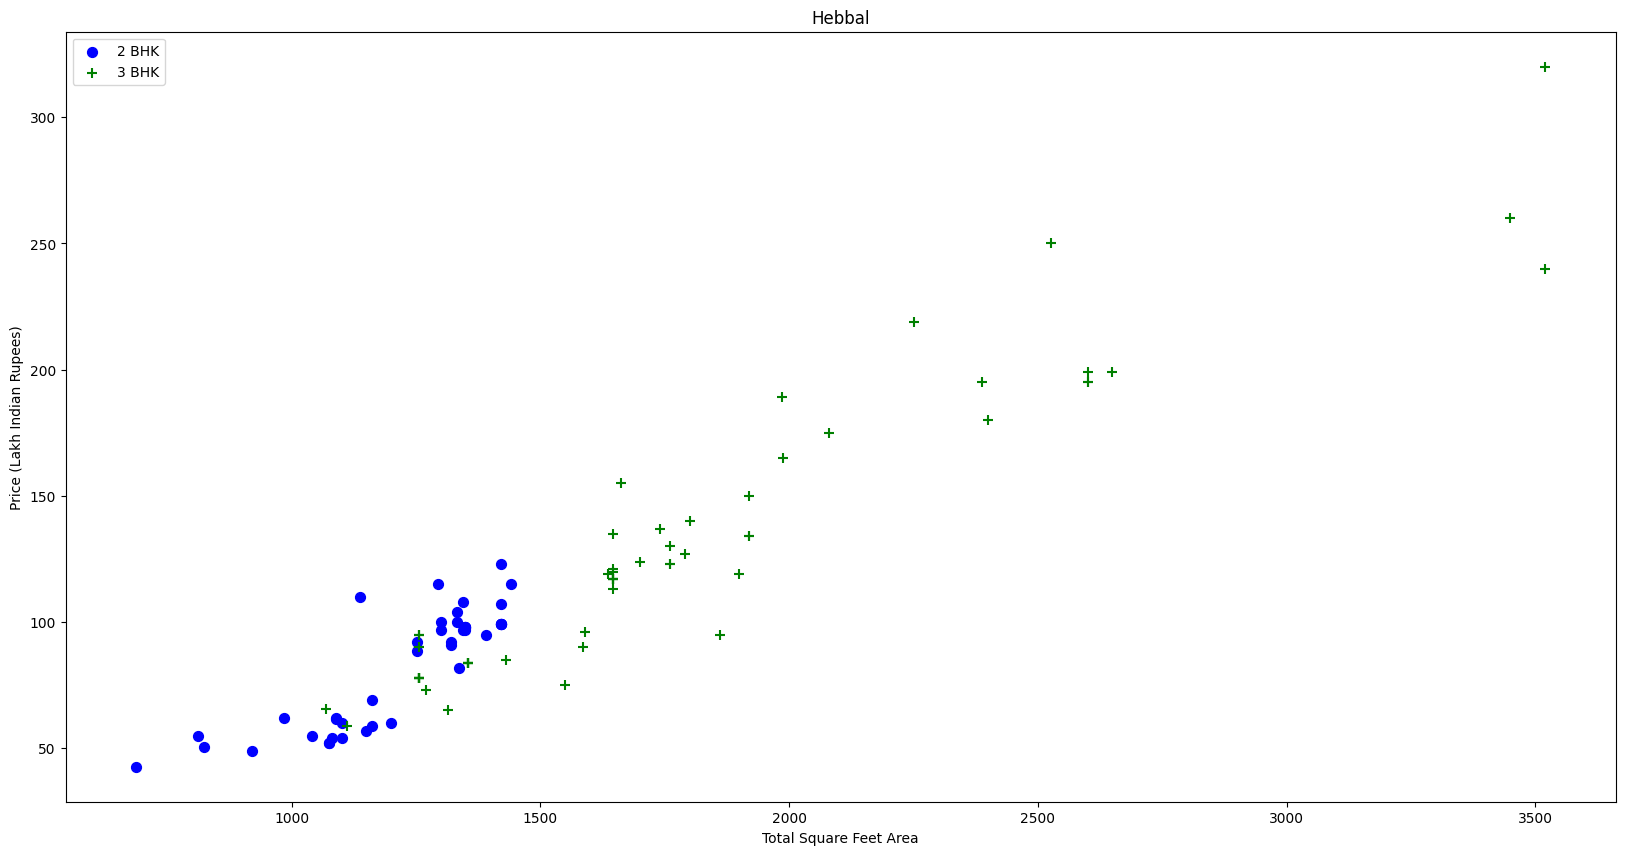

In [38]:
def plot_scatter_chart(df,location):
    # bhk2 = df[(df.location==location) & (df.size==2)]
    # bhk3 = df[(df.location==location) & (df.size==3)]
    bhk2 = df5[(df5['location']==location) & (df5['size']==2)]
    bhk3 = df5[(df5['location']==location) & (df5['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Hebbal")

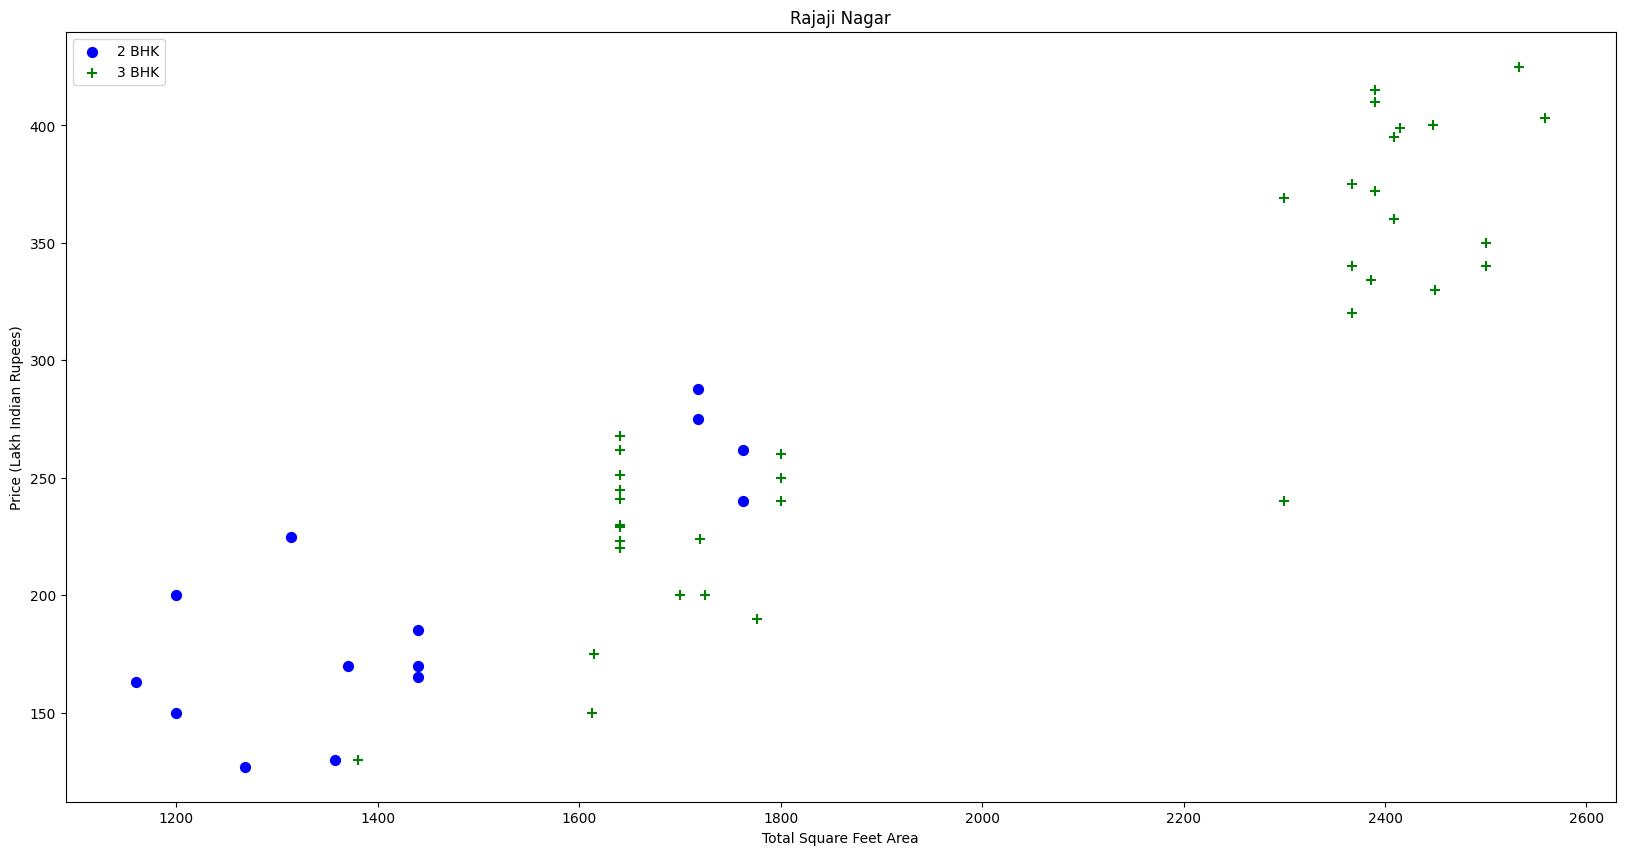

In [39]:
def plot_scatter_chart(df,location):
    # bhk2 = df[(df.location==location) & (df.size==2)]
    # bhk3 = df[(df.location==location) & (df.size==3)]
    bhk2 = df5[(df5['location']==location) & (df5['size']==2)]
    bhk3 = df5[(df5['location']==location) & (df5['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

there are some points where in same area the price of 2 bedroom house is greater than 3 bedroom house having similar square feet area,consider them as outliers
"the price of 2 bedroom house is greater than 3 bedroom house having similar square feet area" this statement can be generalized as some 2 bhk house prices are higher than average price_per_sqft of 3 bhk rooms,so we have to remove that points


In [40]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7329, 6)

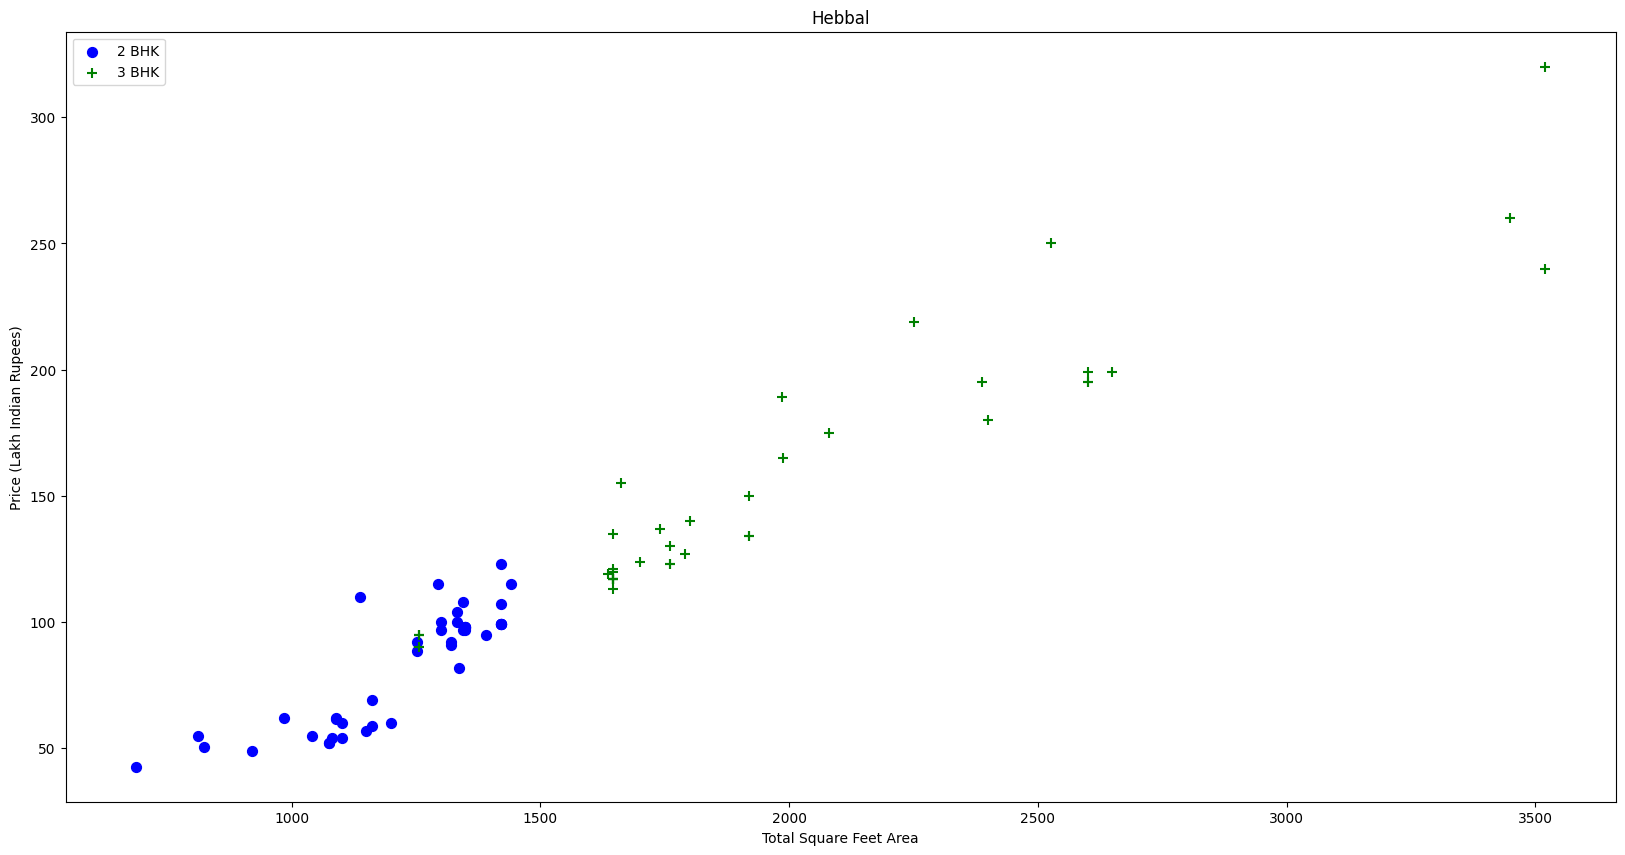

In [41]:
def plot_scatter_chart(df,location):
    # bhk2 = df[(df.location==location) & (df.size==2)]
    # bhk3 = df[(df.location==location) & (df.size==3)]
    bhk2 = df6[(df6['location']==location) & (df6['size']==2)]
    bhk3 = df6[(df6['location']==location) & (df6['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Hebbal")

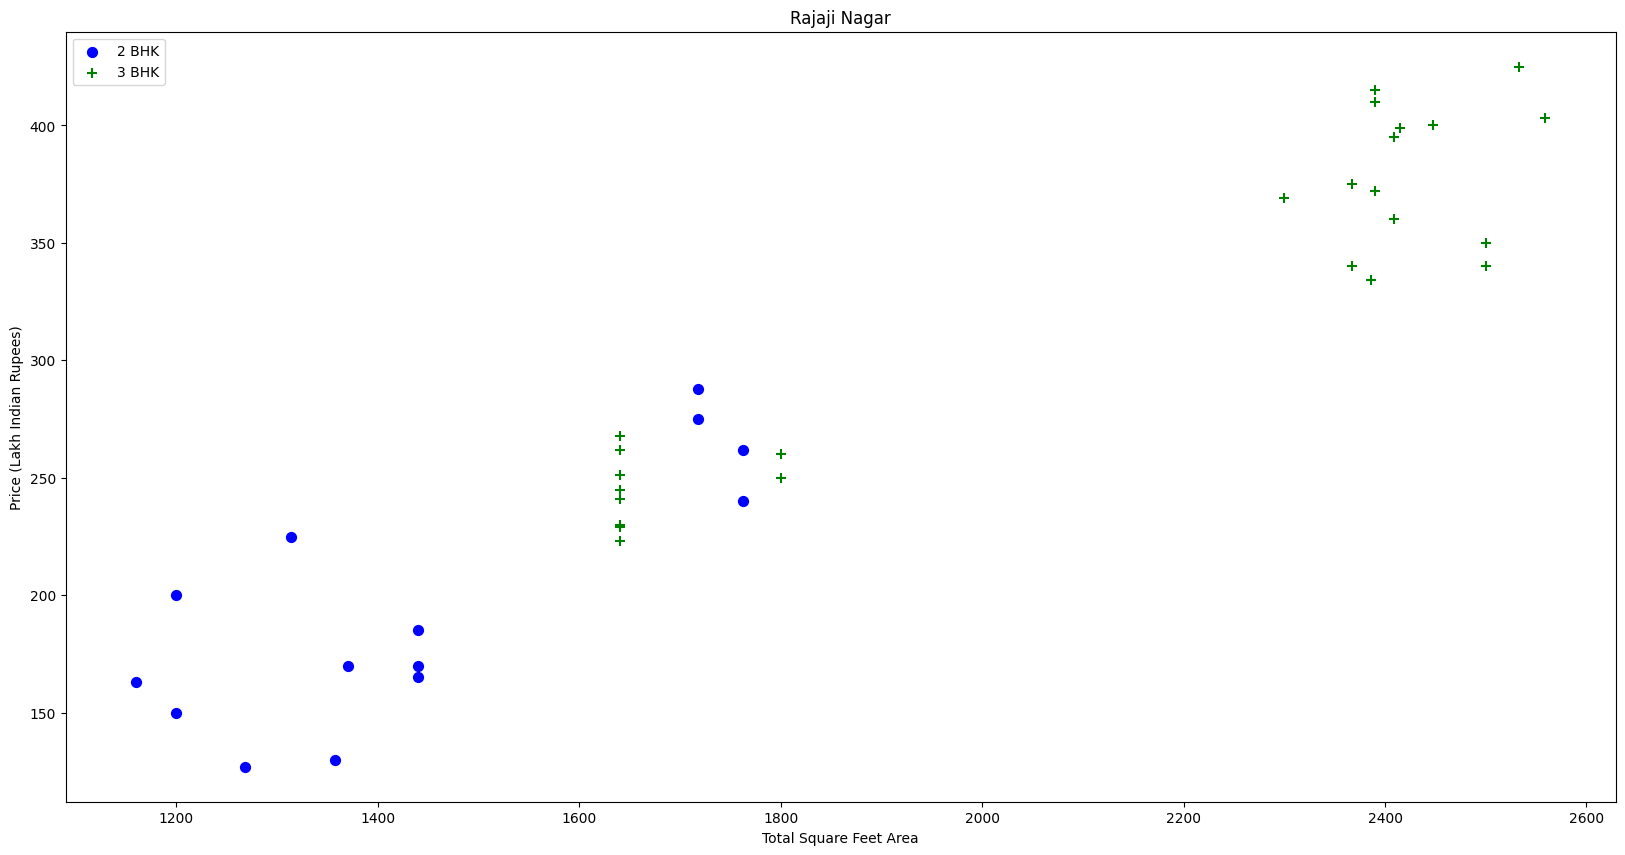

In [42]:
def plot_scatter_chart(df,location):
    # bhk2 = df[(df.location==location) & (df.size==2)]
    # bhk3 = df[(df.location==location) & (df.size==3)]
    bhk2 = df6[(df6['location']==location) & (df6['size']==2)]
    bhk3 = df6[(df6['location']==location) & (df6['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

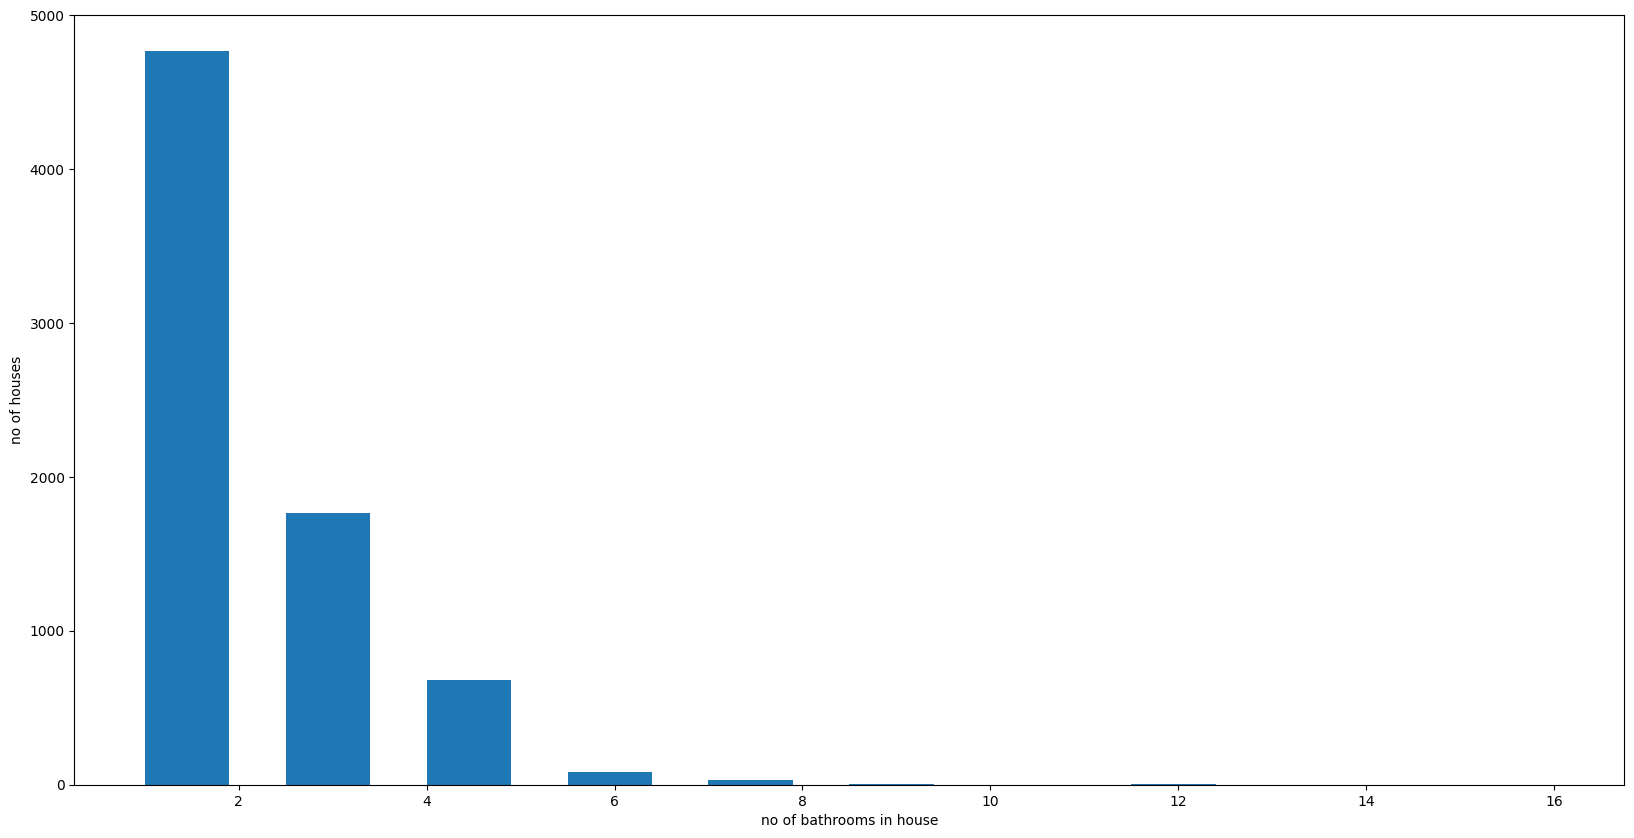

In [43]:
plt.hist(df6['bath'],width=0.9)
plt.xlabel("no of bathrooms in house")
plt.ylabel("no of houses")
plt.show()

For some reasons some houses may have more bathrooms than room which is very rare and unusual thing so lets remove that

In [44]:
df6[df6['bath']>df6['size']+2]


,location,size,total_sqft,bath,price,price_per_sqft
1626,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
5238,Nagasandra,4,7000.0,8.0,450.0,6428.571429
6711,Thanisandra,3,1806.0,6.0,116.0,6423.034330
8411,other,6,11338.0,9.0,1000.0,8819.897689


In [45]:
# Filter rows where the number of bathrooms exceeds the size of the property by more than 2
condition = df6['bath'] >= df6['size'] + 2
rows_to_drop = df6[condition].index

# Drop the filtered rows from the DataFrame
df6.drop(rows_to_drop, inplace=True)

In [46]:
df6.shape

(7251, 6)

Now our data is cleaned and can be fed for model, and price_per_sqft is not neccesary as we have total_sqft both are dependent

In [47]:
# Drop the 'price_per_sqft' column from DataFrame df6
df6.drop('price_per_sqft', axis='columns', inplace=True)


In [48]:
df6.head()

,location,size,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


In [49]:
df6.shape

(7251, 5)

location column has string values,so encoding

In [50]:
dummies=pd.get_dummies(df6.location,dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df7=pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,location,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,1630.0,3.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,1875.0,2.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3,1200.0,2.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,1235.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
print(dummies.values)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [53]:
df7.drop('location',axis='columns',inplace=True)
df7.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df7.shape

(7251, 245)

training using linear regression

In [55]:
X=df7.drop('price',axis='columns')
X.head()
           

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=df7.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
model1=LinearRegression()
model1.fit(X_train,y_train)


LinearRegression()

In [59]:
model1.score(X_test,y_test)

0.8452294733370209

In [61]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
kf=ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(LinearRegression(),X,y,cv=kf)

array([0.8490534 , 0.87834176, 0.84946366, 0.85694762, 0.88946138])

prediction

In [71]:
X.columns

Index(['size', 'total_sqft', 'bath', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [77]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [72]:
def predict_price(location,sqft,bath,size):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return model1.predict([x])[0]

In [73]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\SAI KEERTHAN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49906587091739

In [74]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\SAI KEERTHAN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80509578338867

In [75]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\SAI KEERTHAN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2782086948755

In [76]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\SAI KEERTHAN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58423860734678

In [78]:
import pickle
with open('house_price_predictionmodel1.picke','wb') as file:
    pickle.dump(model1,file)

In [80]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns_housepriceprediction1.json","w") as f:
    f.write(json.dumps(columns))